### Логистическая регрессия

1. Загрузите данные `load_wine` из `sklearn.datasets`. Из данных исключите объекты класса 2.
 Отмасштабируйте признаки, используя класс `StandardScaler` с гиперпараметрами по умолчанию. Обучите логистическую регрессию и оцените важность признаков. Укажите название признака, который оказался наименее значимым.

Обратите внимание, целевое значение лежит по ключу `'target'`, матрица объекты-признаки лежит по ключу `'data'`



In [90]:
from sklearn.datasets import load_wine
data = load_wine()
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [91]:
import numpy as np
import pandas as pd

X = pd.DataFrame(data['data'], columns=data['feature_names'])
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [92]:
Y = pd.Series(data['target'])
Y.unique()

array([0, 1, 2])

In [93]:
mask = data['target'] <=1
Data = data['data'][mask]
target = data['target'][mask]

X = X[Y <= 1]
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0


In [94]:
Y = Y[Y <=1]
Y.unique()

array([0, 1])

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,Y)
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [96]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [97]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [98]:
clf.coef_

array([[-1.47304843, -0.65117106, -0.68525287,  1.1362911 , -0.27910901,
        -0.07756665, -0.25901682,  0.19261829,  0.20237511, -0.90629161,
         0.2345369 , -0.58373406, -1.43687366]])

In [99]:
a = min(clf.coef_[0], key=lambda i: abs(i))
l = list(clf.coef_[0])
list(X)[l.index(a)]

'total_phenols'

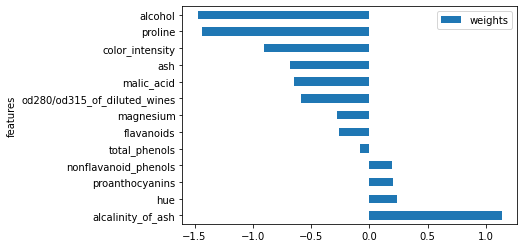

In [100]:
sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights': weights})
ax = df.plot.barh(x='features', y='weights', rot=0,)

2. Загрузите данные `load_wine` из `sklearn.datasets`. Из обучающей части исключите объекты соответствующие классу 2. Не масштабируйте признаки. Обучите логистическую регрессию с гиперпараметрами по умолчанию.
Выберите признак из предложенных, которому соответствует минимальный вес. 


In [78]:
from sklearn.datasets import load_wine

data = load_wine()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [79]:
Y = pd.Series(data['target'])
Y.unique()

array([0, 1, 2])

In [80]:
mask = data['target']<=1
Data = data['data'][mask]
target = data['target'][mask]
X = X[Y <= 1]
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0


In [81]:
Y = Y[Y <=1]
Y.unique()

array([0, 1])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [86]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [87]:
clf.coef_

array([[ 0.57089317, -0.97472751, -0.98462714,  0.44846316,  0.02627604,
         0.49980435, -0.36678132, -0.12654501,  0.70591053, -0.7982037 ,
         0.27708281, -0.3207213 , -0.01667306]])

In [88]:
a = min(clf.coef_[0], key=lambda i: abs(i))
l = list(clf.coef_[0])
list(X)[l.index(a)]

'proline'

3. Решается задача бинарной классификации. Дана матрица объекты признаки 𝑋 и ответы для объектов  𝑦. Обучите логистическую регрессию и предскажите класс объекта x_new

In [101]:
X = np.array([[1, 1], [0.3, 0.7], [0, 4], [-2, -7], [0, -2], [-1, -1], [-2, 0]])
y = np.array([1, 1, 1, 0, 0, 0, 0])
x_new = np.array([[-5, 1]])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [112]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [113]:
clf.predict(x_new)

array([0])

### Классификация текстов

4. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. Укажите полученное число признаков.


Чтобы загрузить данные, скачайте файл по ссылке. Если вы используете google colab, то пример загрузки данных приведен ниже.

In [114]:
import pandas as pd
from google.colab import files
uploder = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [115]:
sentences = []
target = []

with open('SMSSpamCollection') as file:
  for line in file.readlines():
    label, sentence = line.split('\t')
    target.append(label)
    sentences.append(sentence.strip())

In [116]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tqdm

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [117]:
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    regex = re.compile('[^a-z A-Z]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        preprocess_texts.append( ' '.join(filtered_sentence))
    
    return preprocess_texts

In [118]:
preprocessed_sentences = preprocess_text(sentences)

100%|██████████| 5574/5574 [00:01<00:00, 3831.36it/s]


In [119]:
sen_train, sen_test, target_train, target_test = train_test_split(preprocessed_sentences, target)
sen_train, target_train = preprocessed_sentences[:4000], target[:4000]
sen_text, target_text = preprocessed_sentences[4000:], target[4000:]

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def bow(vectorizer, train, test):
  train_bow = vectorizer.fit_transform(train)
  test_bow = vectorizer.transform(test)
  return train_bow, test_bow

In [121]:
sen_train_bow, sen_test_bow = bow(vectorizer, sen_train, sen_test)

In [122]:
sen_train_bow.shape

(4000, 6412)

In [123]:
sen_test_bow.shape

(1394, 6412)

5.  Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, помимо слов входящих в тексты, учитывайте биграммы (используйте гиперпараметр `ngram_range`). Укажите полученное число признаков.

In [124]:
sen_train, sen_test, target_train, target_test = train_test_split(preprocessed_sentences, target)
sen_train, target_train = preprocessed_sentences[:4000], target[:4000]
sen_tуые, target_tуые = preprocessed_sentences[4000:], target[4000:]

vectorizer_with_ngrams = TfidfVectorizer(ngram_range=(1, 2))

In [125]:
def bow(vectorizer_with_ngrams, train, test):
    train_bow = vectorizer_with_ngrams.fit_transform(train)
    test_bow= vectorizer_with_ngrams.transform(test)
    return train_bow, test_bow

In [126]:
sen_train_ngram, sen_test_ngram = bow(vectorizer_with_ngrams, sen_train, sen_test)

In [127]:
sen_train_ngram.shape

(4000, 29250)

In [128]:
sen_test_ngram.shape

(1394, 29250)

6. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, не учитывайте слова, которые встретились меньше 2 раз в обучающей выборке (используйте гиперпараметр `min_df`). Укажите полученное число признаков.

In [129]:
sen_train, sen_test, target_train, target_test = train_test_split(preprocessed_sentences, target)
sen_train, target_train = preprocessed_sentences[:4000], target[:4000]
sen_test, target_test = preprocessed_sentences[4000:], target[4000:]

vectorizer_df_min = TfidfVectorizer(min_df=2)

In [130]:
sen_train_min_df, sen_test_min_df = bow(vectorizer_df_min, sen_train, sen_test)

In [131]:
sen_train_min_df.shape

(4000, 2960)

In [132]:
sen_test_min_df.shape

(1574, 2960)

7. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. На полученных векторных представлениях обучите логистическую регрессию и оцените долю правильных ответов на тестовой части. Укажите полученное значение доли правильных ответов.

In [133]:
sen_train, sen_test, target_train, target_test =  train_test_split(preprocessed_sentences, target)
sen_train, target_train = preprocessed_sentences[:4000], target[:4000]
sen_test, target_test = preprocessed_sentences[4000:], target[4000:]

vectorizer = TfidfVectorizer()

In [134]:
def bow(vectorizer, train, test):
    train_bow = vectorizer.fit_transform(train)
    test_bow = vectorizer.transform(test)
    return train_bow, test_bow

In [135]:
sen_train_b, sen_test_b = bow(vectorizer, sen_train, sen_test)

In [136]:
clf = LogisticRegression()
clf.fit(sen_train_b, target_train)

LogisticRegression()

In [137]:
preds = clf.predict(sen_test_b)
preds.shape

(1574,)

In [141]:
from sklearn.metrics import accuracy_score

round(accuracy_score(preds, target_test),2)

0.97